## An Introduction to Image Augmentation using fastai Library

Setting the magic functions.

In [1]:
%reload_ext autoreload 
%autoreload 2 
%matplotlib inline

I'll be using the fastai vision module to showcase the transforms featured inside of the library.

In [2]:
from fastai import *
from fastai.vision import *

Set batch_size to lower values if this gives errors.

In [3]:
bs = 64

[](http://)[Code from fastai Lesson 1](course.fast.ai)

Let's first download the PETS Dataset to do a proof by example. 

After downloading the dataset, we've set the reg_ex

In [4]:
path = untar_data(URLs.PETS)
path_anno = path/'annotations'
path_img = path/'images'
fnames = get_image_files(path_img)
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

## Does Data Augmentation really help?

Below is a simple comparision of 2 training loops, one where we run with data augmentations off and on respectively. 
This is to compare our resulting accuracy/loss values.
Let's train Resnet 18 architecture for 15 epochs, with data augmentation off and on.

## Data Aug OFF

In [5]:
bs=4

Disabling everything

In [6]:
# tfms=ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
#                               )
tfms = None

In [7]:
np.random.seed(42)
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=tfms, size=224,  bs=bs, num_workers=0
                                  ).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet18, metrics=error_rate)
learn.fit_one_cycle(15)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:01<00:00, 25750048.37it/s]


## Data Augmentation ON

For this loop, we enable the defaults and create a separate learner.

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224,  bs=bs, num_workers=0
                                  ).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet18, metrics=error_rate)
learn.fit_one_cycle(15)

## Transformations in fastai

- How do we enable transforms?
- Knowing the defaults.
- List of Transforms 
- Examples and potential use-cases
- Under the hood: Where and how are these implemented?

### Enabling Transforms

Transforms are passed on when creating the "ImageDataBunch" objects.

Genearlly, you may enable the "Default" transforms by calling ```tfms = get_transforms()```. Let's check the default transforms:

Source: [fastai docs](docs.fast.ai)

```
get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Optional[Collection[Transform]]=None) → Collection[Transform]
```

In [9]:
tfms = get_transforms()
type(tfms)

tuple

In [10]:
tfms = get_transforms()
len(tfms)

2

### Why do we have 2 tfms?

The tuple contating transforms has 2 lists nested. 

One is for the training dataset.

Second one is for the validation dataset that involves minimal transforms/just resizing.

In [11]:
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0

Following is the list of transforms supported by the library.

We'll take a look at where these might be useful.

## List of transforms:

[Source: fastai docs](https://docs.fast.ai/vision.transform.html)

- brightness
- contrast
- crop
- crop_pad
- dihedral
- dihedral_affine
- flip_lr
- flip_affine
- jitter
- pad
- perspective_warp
- resize
- rotate
- skew
- squish
- symmetric_warp
- tilt
- zoom
- cutout

### Convenience functions
- rand_crop
- rand_pad
- rand_zoom

In [12]:
#Helper functions from fastai docs
def get_ex(): return open_image(path/'images/beagle_192.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

By default, fastai already does a few transforms as named above, these are defined by calling get_transforms()
Let's try re-sizing the image to 224 pixels

## Resizing

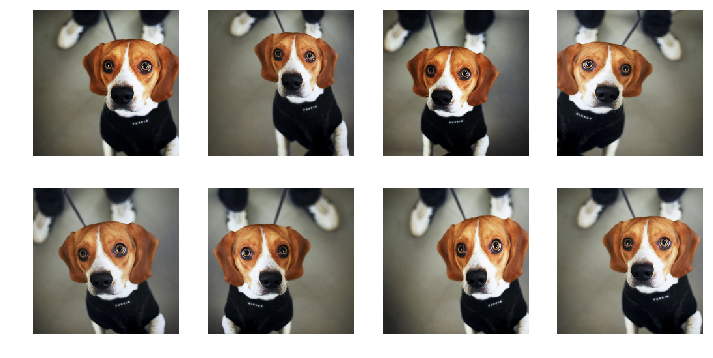

In [13]:
plots_f(2, 4, 12, 6, size=224)

## Rotation
(max_rotate=angle) toggles random rotations between -angle to + angle specified here.

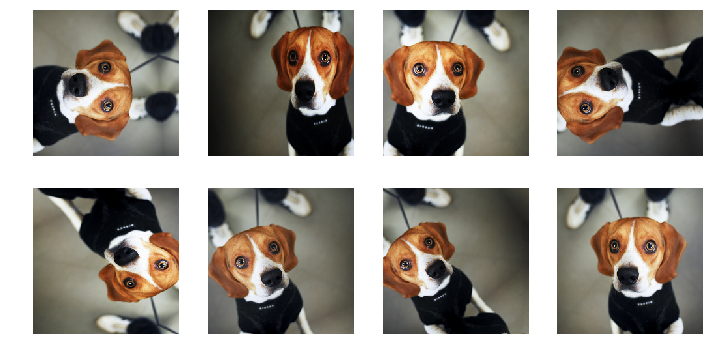

In [14]:
tfms = get_transforms(max_rotate=180)
plots_f(2, 4, 12, 6, size=224)

This might make more sense in a sattelite image. Let's look at an example

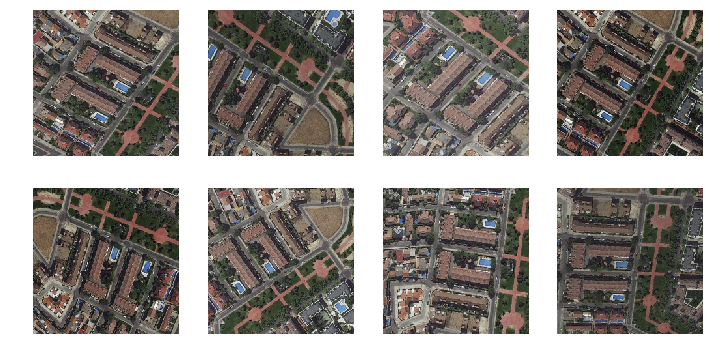

In [15]:
def get_ex(): return open_image("../input/satt.jpg")

def plots_f_sate(rows, cols, width, height, **kwargs):
    [get_ex.apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
    
tfms = get_transforms(max_rotate=180)
plots_f(2, 4, 12, 6, size=224)

## Brightness

In [16]:
def get_ex(): return open_image(path/'images/beagle_192.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

We can vary the brightness from 0 to 1, 0.5 being the default.

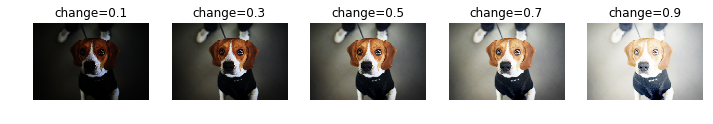

In [17]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for change, ax in zip(np.linspace(0.1,0.9,5), axs):
    brightness(get_ex(), change).show(ax=ax, title=f'change={change:.1f}')

Let's look at an example, where our target is to perform text extraction on this image. 
Based on the real world scenario, we might have to play around with the brightness for such cases. In the example below, 0.3 seems to be the best result

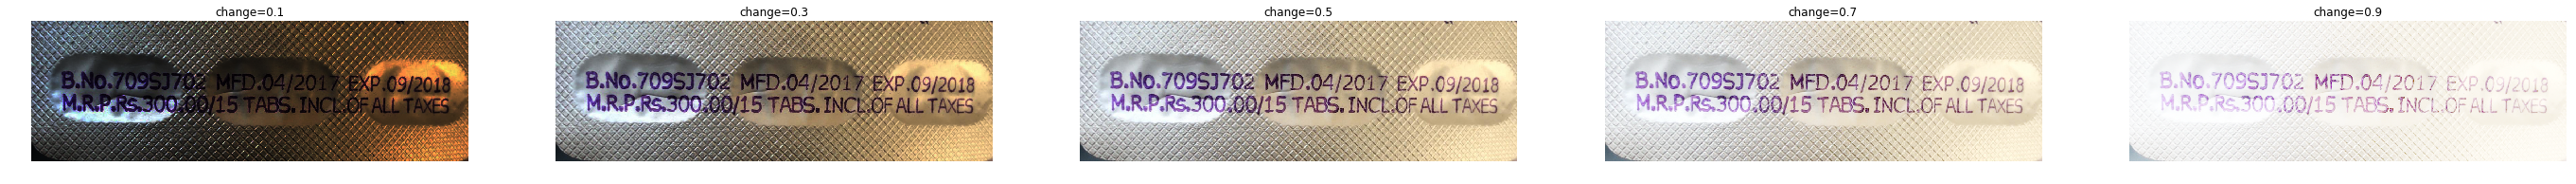

In [18]:
def get_ex(): return open_image("../input/contrast_example.jpg")

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
    
fig, axs = plt.subplots(1,5,figsize=(48,24))
for change, ax in zip(np.linspace(0.1,0.9,5), axs):
    brightness(get_ex(), change).show(ax=ax, title=f'change={change:.1f}')


## Contrast

Contrast can be varied from a scale of 0 to 2. 
1 being the default

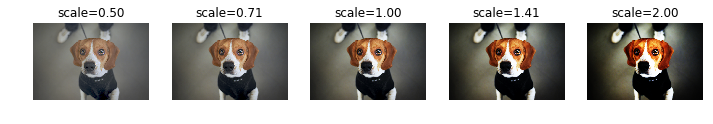

In [19]:
def get_ex(): return open_image(path/'images/beagle_192.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

fig, axs = plt.subplots(1,5,figsize=(12,4))
for scale, ax in zip(np.exp(np.linspace(log(0.5),log(2),5)), axs):
    contrast(get_ex(), scale).show(ax=ax, title=f'scale={scale:.2f}')


Lets again look at the example from the previous scenario. 

For performing text extraction, we'd like to have the text "stand-out" as much from the background as possible. 
For our example, 2 seems to be the best value.

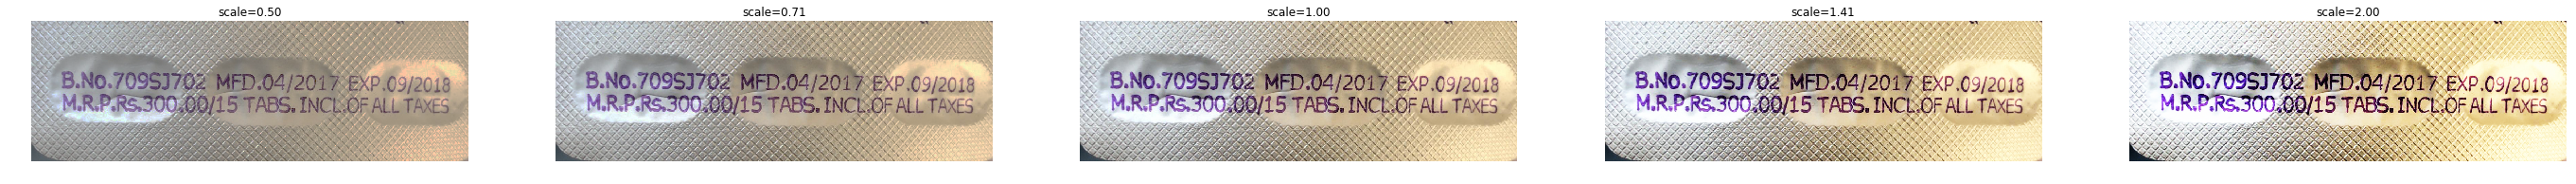

In [20]:
def get_ex(): return open_image("../input/contrast_example.jpg")

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
    
fig, axs = plt.subplots(1,5,figsize=(48,4))
for scale, ax in zip(np.exp(np.linspace(log(0.5),log(2),5)), axs):
    contrast(get_ex(), scale).show(ax=ax, title=f'scale={scale:.2f}')

## Crop

Crop helps crop in and out of our images.

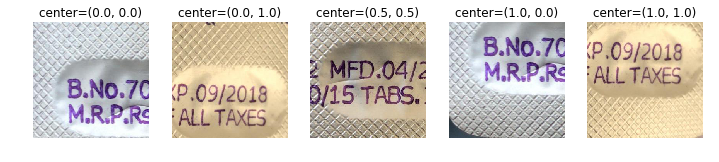

In [21]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for center, ax in zip([[0.,0.], [0.,1.],[0.5,0.5],[1.,0.], [1.,1.]], axs):
    crop(get_ex(), 300, *center).show(ax=ax, title=f'center=({center[0]}, {center[1]})')

## Crop_pad

Crop_pad, crops and pads based on the set mode. The one recommended by fastai dev(s) is "reflection padding". See the examples below for zero and reflection padding.

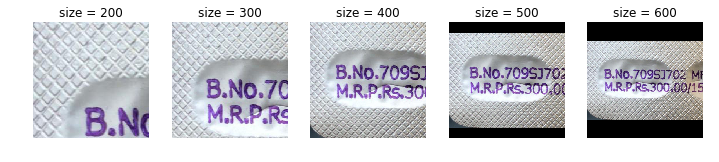

In [22]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for size, ax in zip(np.linspace(200,600,5), axs):
    crop_pad(get_ex(), int(size), 'zeros', 0.,0.).show(ax=ax, title=f'size = {int(size)}')

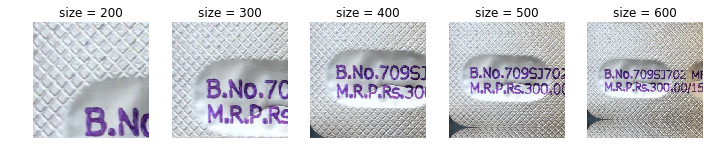

In [23]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
for size, ax in zip(np.linspace(200,600,5), axs):
    crop_pad(get_ex(), int(size), 'reflection', 0.,0.).show(ax=ax, title=f'size = {int(size)}')

## Dihedral

Dihedral transforms rotates the images in the 8 possible directions/angles of a dihedron.

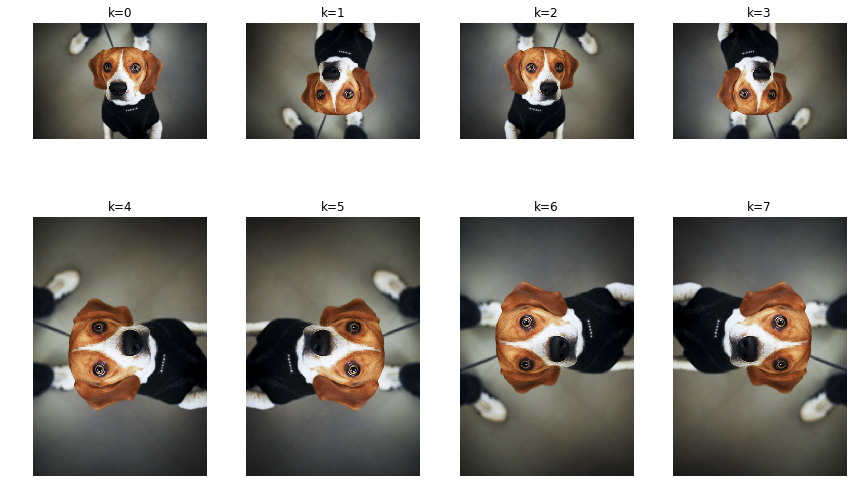

In [24]:
def get_ex(): return open_image(path/'images/beagle_192.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

    
fig, axs = plt.subplots(2,4,figsize=(12,8))
for k, ax in enumerate(axs.flatten()):
    dihedral(get_ex(), k).show(ax=ax, title=f'k={k}')
plt.tight_layout()

Consider the example below of a sattelite image where this might be useful.

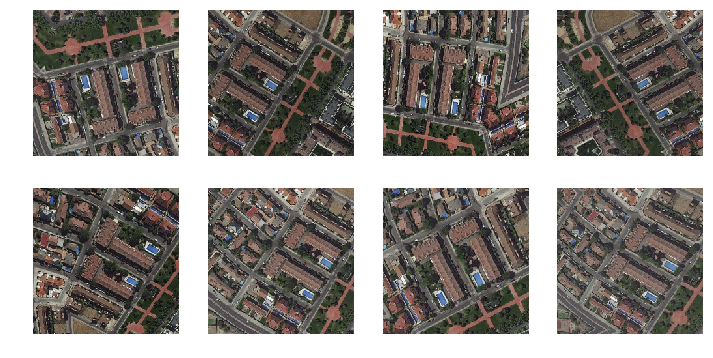

In [25]:
def get_ex(): return open_image("../input/satt.jpg")

def plots_f_sate(rows, cols, width, height, **kwargs):
    [get_ex.apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
    
tfms = get_transforms(max_rotate=180)
plots_f(2, 4, 12, 6, size=224)

## jitter

Jitter is used to add "jitter/noise" to the image

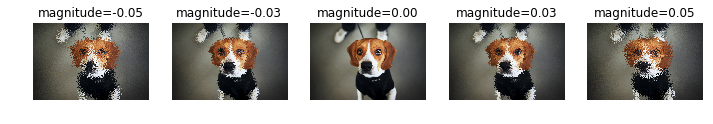

In [26]:
def get_ex(): return open_image(path/'images/beagle_192.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

fig, axs = plt.subplots(1,5,figsize=(12,4))
for magnitude, ax in zip(np.linspace(-0.05,0.05,5), axs):
    tfm = jitter(magnitude=magnitude)
    get_ex().jitter(magnitude).show(ax=ax, title=f'magnitude={magnitude:.2f}')

## perspective_warp

This transform changes the perspective of the image as if our object was moved around.

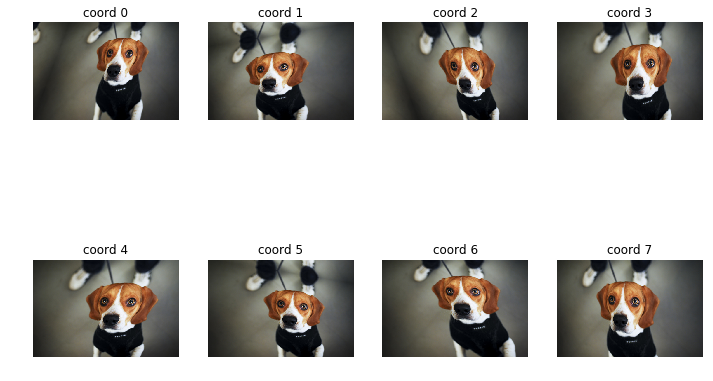

In [27]:
def get_ex(): return open_image(path/'images/beagle_192.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

fig, axs = plt.subplots(2,4,figsize=(12,8))
for i, ax in enumerate(axs.flatten()):
    magnitudes = torch.tensor(np.zeros(8))
    magnitudes[i] = 0.5
    perspective_warp(get_ex(), magnitudes).show(ax=ax, title=f'coord {i}')

Consider the case where your user for the OCR app takes the image at an angle and this transform might come in handy for that scenario

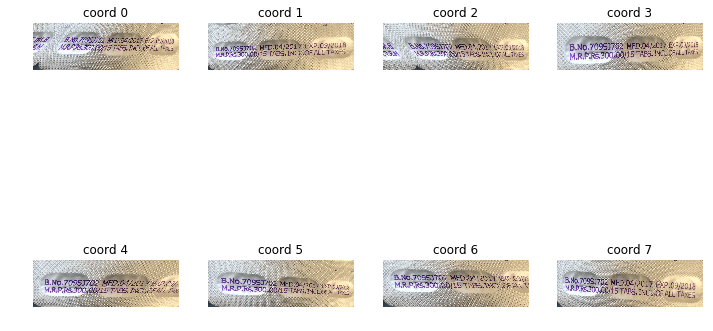

In [28]:
def get_ex(): return open_image("../input/contrast_example.jpg")

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

    
fig, axs = plt.subplots(2,4,figsize=(12,8))
for i, ax in enumerate(axs.flatten()):
    magnitudes = torch.tensor(np.zeros(8))
    magnitudes[i] = 0.5
    perspective_warp(get_ex(), magnitudes).show(ax=ax, title=f'coord {i}')

## symmetric_warp

By example, symmetric warp might be handy when you're building a product detector and you need to add more examples/different angles to your dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


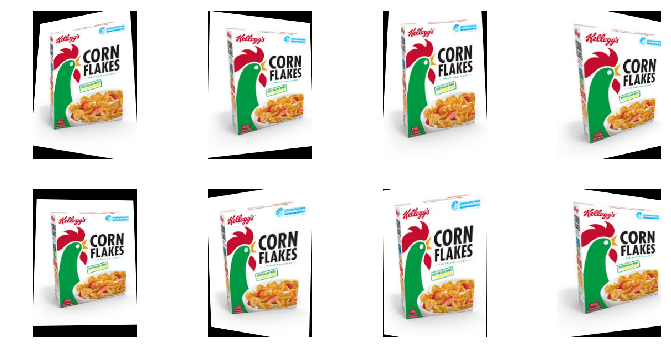

In [29]:
def get_ex(): return open_image("../input/cereal_ex.jpg")

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
    
tfm = symmetric_warp(magnitude=(-0.2,0.2))
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = get_ex().apply_tfms(tfm, padding_mode='zeros')
    img.show(ax=ax)

## Tilt

Tilt can be another transform handy for the same scenario.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


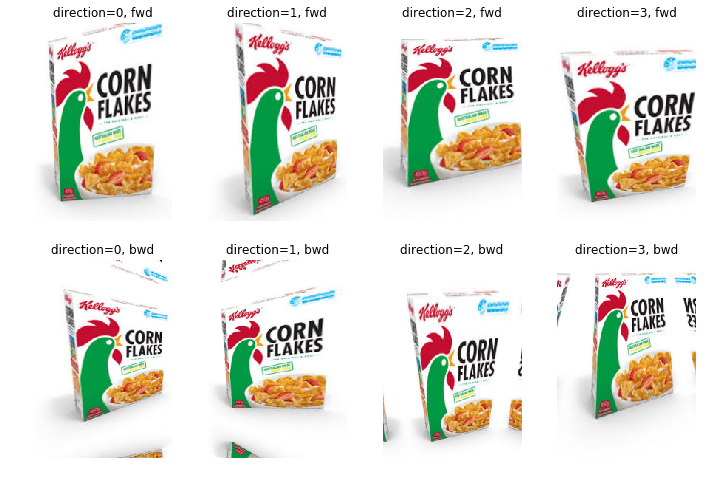

In [30]:
def get_ex(): return open_image("../input/cereal_ex.jpg")

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]
    
fig, axs = plt.subplots(2,4,figsize=(12,8))
for i in range(4):
    get_ex().tilt(i, 0.4).show(ax=axs[0,i], title=f'direction={i}, fwd')
    get_ex().tilt(i, -0.4).show(ax=axs[1,i], title=f'direction={i}, bwd')

## Cutout

```
def get_ex(): return open_image(path/'images/beagle_192.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

tfms = [cutout(n_holes=(1,4), length=(10, 160), p=.5)]
fig, axs = plt.subplots(1,5,figsize=(12,4))
for ax in axs:
    get_ex().apply_tfms(tfms).show(ax=ax)

```

# fin